In [22]:
from matplotlib import style
import random

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#xn=np.array([2,6,4,5,8,7],dtype=np.float64)
#n=np.array([2,3,5,6,9,8],dtype=np.float64)

In [30]:
def create_dataset(hm,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation =='neg':
            var-=step
    xs=[i for i in range(len(ys))]
            
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)


In [54]:
xn,yn=create_dataset(40,80,2,correlation='pos')

In [55]:
def bestfit(xn,yn):
    m=((mean(xn)*mean(yn)) - mean(xn*yn)) /  ((mean(xn)*mean(xn)) - mean(xn**2))
    b=mean(xn) - m*mean(yn)  
    return m,b

In [56]:
m,b=bestfit(xn,yn)

In [57]:
print(m)

2.7868667917448406


In [58]:
regression_line= [(m*x)+b for x in xn]

In [59]:
predict_x=8
predict_y=(m*predict_x)+b

In [60]:
def squared_error(yn_o,yn_line):
    return sum((yn_line - yn_o)**2)

In [61]:
def coeff(yn_o,yn_line):
    y_mean_line=[mean(yn_o) for y in yn_o]
    se_er_regr=squared_error(yn,yn_line)
    se_error_mean=squared_error(yn,y_mean_line)
    return 1 - (se_er_regr / se_error_mean)

In [62]:
r_squared = coeff(yn,regression_line)

In [63]:
print(r_squared)

0.28794383301701354


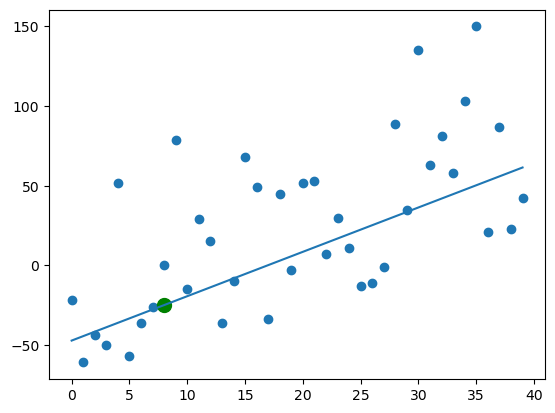

In [64]:
plt.scatter(xn,yn)
plt.plot(xn,regression_line)
plt.scatter(predict_x,predict_y,s=100,color='g')
plt.show()